In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


In [2]:
data=pd.read_csv('mobile_price_data.csv')
data.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


### Explanatory data analysis(EDA)

In [3]:
data.shape

(459, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [5]:
data.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Vivo Z1Pro (Sonic Black, 64 GB)","₹11,999",Black,Dual Sim,16.51 cm (6.5 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,4,19,28,458,51,66,126,444,149,185,160,72,112,139,459,135,35,23,48,27


In [6]:
data['bluetooth'].unique()

array(['Yes'], dtype=object)

In [7]:
data.isnull().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [8]:
data.shape

(459, 20)

In [9]:
data=data.drop_duplicates()

In [10]:
data.shape[0]

406

### Data cleaning and preprocessing


In [11]:
# Remove the '₹' symbol from the 'mobile_price' column and convert to numerical
data['mobile_price']=data['mobile_price'].str.replace("₹",'').str.replace(',','').astype(float)

In [12]:
# Extract numerical values from the 'disp_size' column
data['disp_size']=data['disp_size'].str.extract('([\d.]+)').astype(float)

In [13]:
data['dual_sim'].unique()

array(['Dual Sim', 'Single Sim'], dtype=object)

In [14]:
# Convert 'ram' column to numerical values (extracting GB)
data['ram'] = data['ram'].str.extract('(\d+)').astype(int)

In [15]:
data['mob_height'].unique()

array(['164.4 mm', '157 mm', '161 mm', '156.7 mm', '158.7 mm',
       '158.96 mm', '162.1 mm', '163.9 mm', '154.3 mm', '163.8 mm',
       '156.1 mm', '156.48 mm', '165.75 mm', '153.48 mm', '159.21 mm',
       '151.86 mm', '160.73 mm', '157.9 mm', '162.58 mm', '158.58 mm',
       '144 mm', '175 mm', '158.3 mm', '151 mm', '165.5 mm', '140.4 mm',
       '146.3 mm', '147.5 mm', '158.73 mm', '153 mm', '159.43 mm',
       '159.53 mm', '159.25 mm', '155.11 mm', '162.04 mm', '162.39 mm',
       '162.15 mm', '159.64 mm', '159.01 mm', '157.25 mm', '159 mm',
       '157.91 mm', '162 mm', '155.06 mm', '154.81 mm', '161.97 mm',
       '149.3 mm', '155.21 mm', '155.87 mm', '149.9 mm', '154.6 mm',
       '9 mm', '163.6 mm', '143.4 mm', '162.5 mm', '136.5 mm', '152.4 mm',
       '78.6 mm', '165 mm', '158 mm', '158.25 mm', '153.9 mm', '164 mm',
       '166.38 mm', '156 mm', '155.5 mm', '165.3 mm', '155.9 mm',
       '160.2 mm', '158.8 mm', '161.3 mm', '160 mm', '161.8 mm',
       '150.5 mm', '154.4 mm'

In [16]:
data['mob_depth'].unique()

array(['8.95 mm', '9 mm', '8.9 mm', '8.7 mm', '8.5 mm', '8.55 mm',
       '9.65 mm', '9.6 mm', '9.4 mm', '9.3 mm', '8.6 mm', '8.3 mm',
       '8.8 mm', '8.475 mm', '8.1 mm', '7.7 mm', '8.26 mm', '7.3 mm',
       '8.96 mm', '8.05 mm', '92 mm', '75.3 mm', '8.4 mm', '8.35 mm',
       '9.55 mm', '8.47 mm', '8.92 mm', '8.13 mm', '8.68 mm', '8.28 mm',
       '9.11 mm', '8.85 mm', '8.89 mm', '8.54 mm', '8.21 mm', '9.8 mm',
       '7.9 mm', '7.98 mm', '7.77 mm', '7.89 mm', '7.8 mm', '7.5 mm',
       '75 mm', '7.6 mm', '8.65 mm', '7.95 mm', '8.79 mm', '9.1 mm',
       '8.2 mm', '9.5 mm', '8.67 mm', '7.4 mm', '7.99 mm', '7.38 mm',
       '76 mm'], dtype=object)

In [17]:
data['mob_width'].unique()

array(['75 mm', '75.4 mm', '74.2 mm', '75.7 mm', '74 mm', '75.16 mm',
       '74.24 mm', '74.8 mm', '75.8 mm', '73.7 mm', '75.6 mm', '75.2 mm',
       '75.41 mm', '74.3 mm', '76.68 mm', '71.85 mm', '75.21 mm',
       '75.49 mm', '77.26 mm', '76.4 mm', '75.35 mm', '73.6 mm', '9 mm',
       '8.35 mm', '76 mm', '70.1 mm', '70.4 mm', '71.5 mm', '75.58 mm',
       '76.2 mm', '76.77 mm', '75.23 mm', '75.19 mm', '75.09 mm',
       '76.46 mm', '77.33 mm', '76.47 mm', '75.04 mm', '74.17 mm',
       '74.71 mm', '74.7 mm', '75.08 mm', '77 mm', '75.03 mm', '75.93 mm',
       '72.8 mm', '75.24 mm', '75.74 mm', '72.9 mm', '159 mm', '75.3 mm',
       '72.1 mm', '69 mm', '152.4 mm', '76.8 mm', '76.88 mm', '75.25 mm',
       '72.85 mm', '82.38 mm', '76.6 mm', '75.5 mm', '73.3 mm', '73.4 mm',
       '76.1 mm', '77.2 mm', '73.1 mm', '77.35 mm', '74.6 mm', '154.5 mm',
       '73.8 mm'], dtype=object)

In [18]:
data['mob_weight'].unique()

array(['195 g', '199 g', '184 g', '174 g', '183 g', '207 g', '191 g',
       '166 g', '198 g', '182 g', '202 g', '175 g', '188 g', '209 g',
       '173.8 g', '186 g', '185 g', '168 g', '181 g', '145 g', '190 g',
       '165 g', '137 g', '146 g', '180 g', '154 g', '190.5 g', '189.6 g',
       '186.7 g', '163.5 g', '197 g', '201 g', '193 g', '186.5 g',
       '176 g', '179 g', '201.8 g', '156 g', '148 g', '150 g', '189.5 g',
       '139 g', '151 g', '160 g', '142 g', '143 g', '162.8 g', '187 g',
       '130 g', '178 g', '170 g', '194 g', '159 g', '155 g', '208 g',
       '172 g', '192 g', '215 g', '189 g', '169 g', '158 g', '153 g'],
      dtype=object)

In [19]:
data['resolution'] = data['resolution'].str.extract('(\d+)').astype(float)


In [20]:
data['mp_speed'] = data['mp_speed'].str.extract('([\d.]+)').astype(float)

In [21]:
# Preprocess p_cam and f_cam features
data['p_cam'] = data['p_cam'].str.extract('(\d+)').astype(int)
data['f_cam'] = data['f_cam'].str.extract('(\d+)').astype(int)


In [22]:
data['int_memory'] = data['int_memory'].str.extract('(\d+)').astype(int)


In [23]:
# Preprocess battery_power feature
data['battery_power'] = data['battery_power'].str.extract('(\d+)').astype(int)

In [24]:
# Preprocess mob_width, mob_height, mob_depth features
data['mob_width'] = data['mob_width'].str.extract('([\d.]+)').astype(float)
data['mob_height'] = data['mob_height'].str.extract('([\d.]+)').astype(float)
data['mob_depth'] = data['mob_depth'].str.extract('([\d.]+)').astype(float)

In [25]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['num_cores'] = label_encoder.fit_transform(data['num_cores'])
data['dual_sim'] = label_encoder.fit_transform(data['dual_sim'])

In [27]:
# Drop unnecessary columns
data.drop(['mobile_name', 'mobile_color', 'os', 'network', 'bluetooth','mob_weight'], axis=1, inplace=True)


### Outlier Detection and Visualization

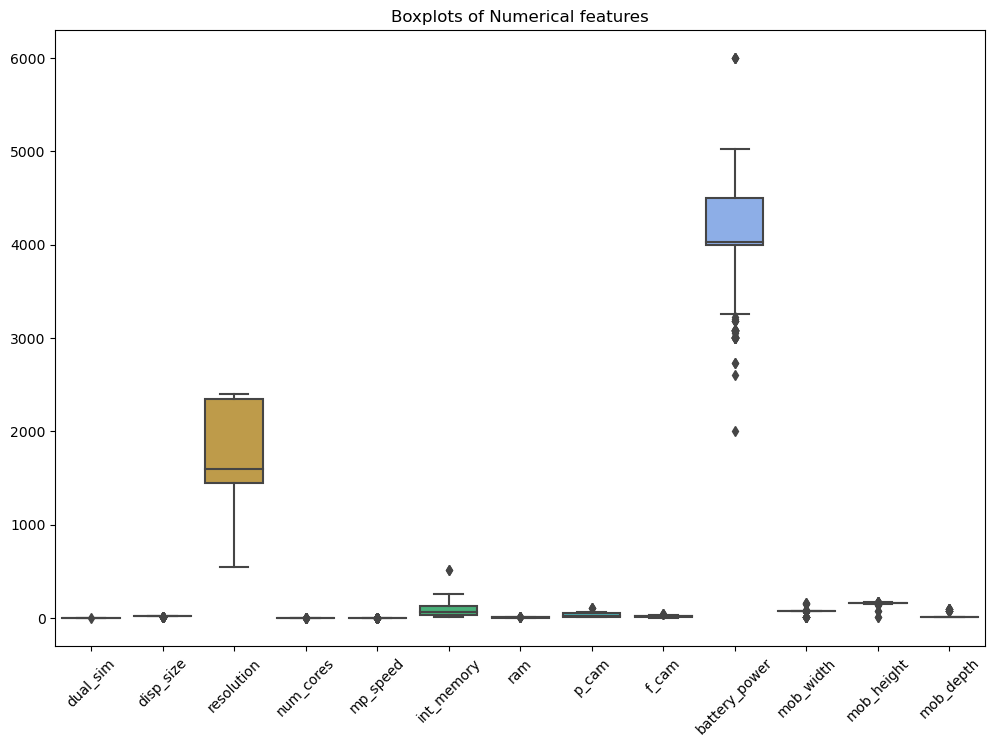

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data.drop('mobile_price',axis=1))
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical features")
plt.show()

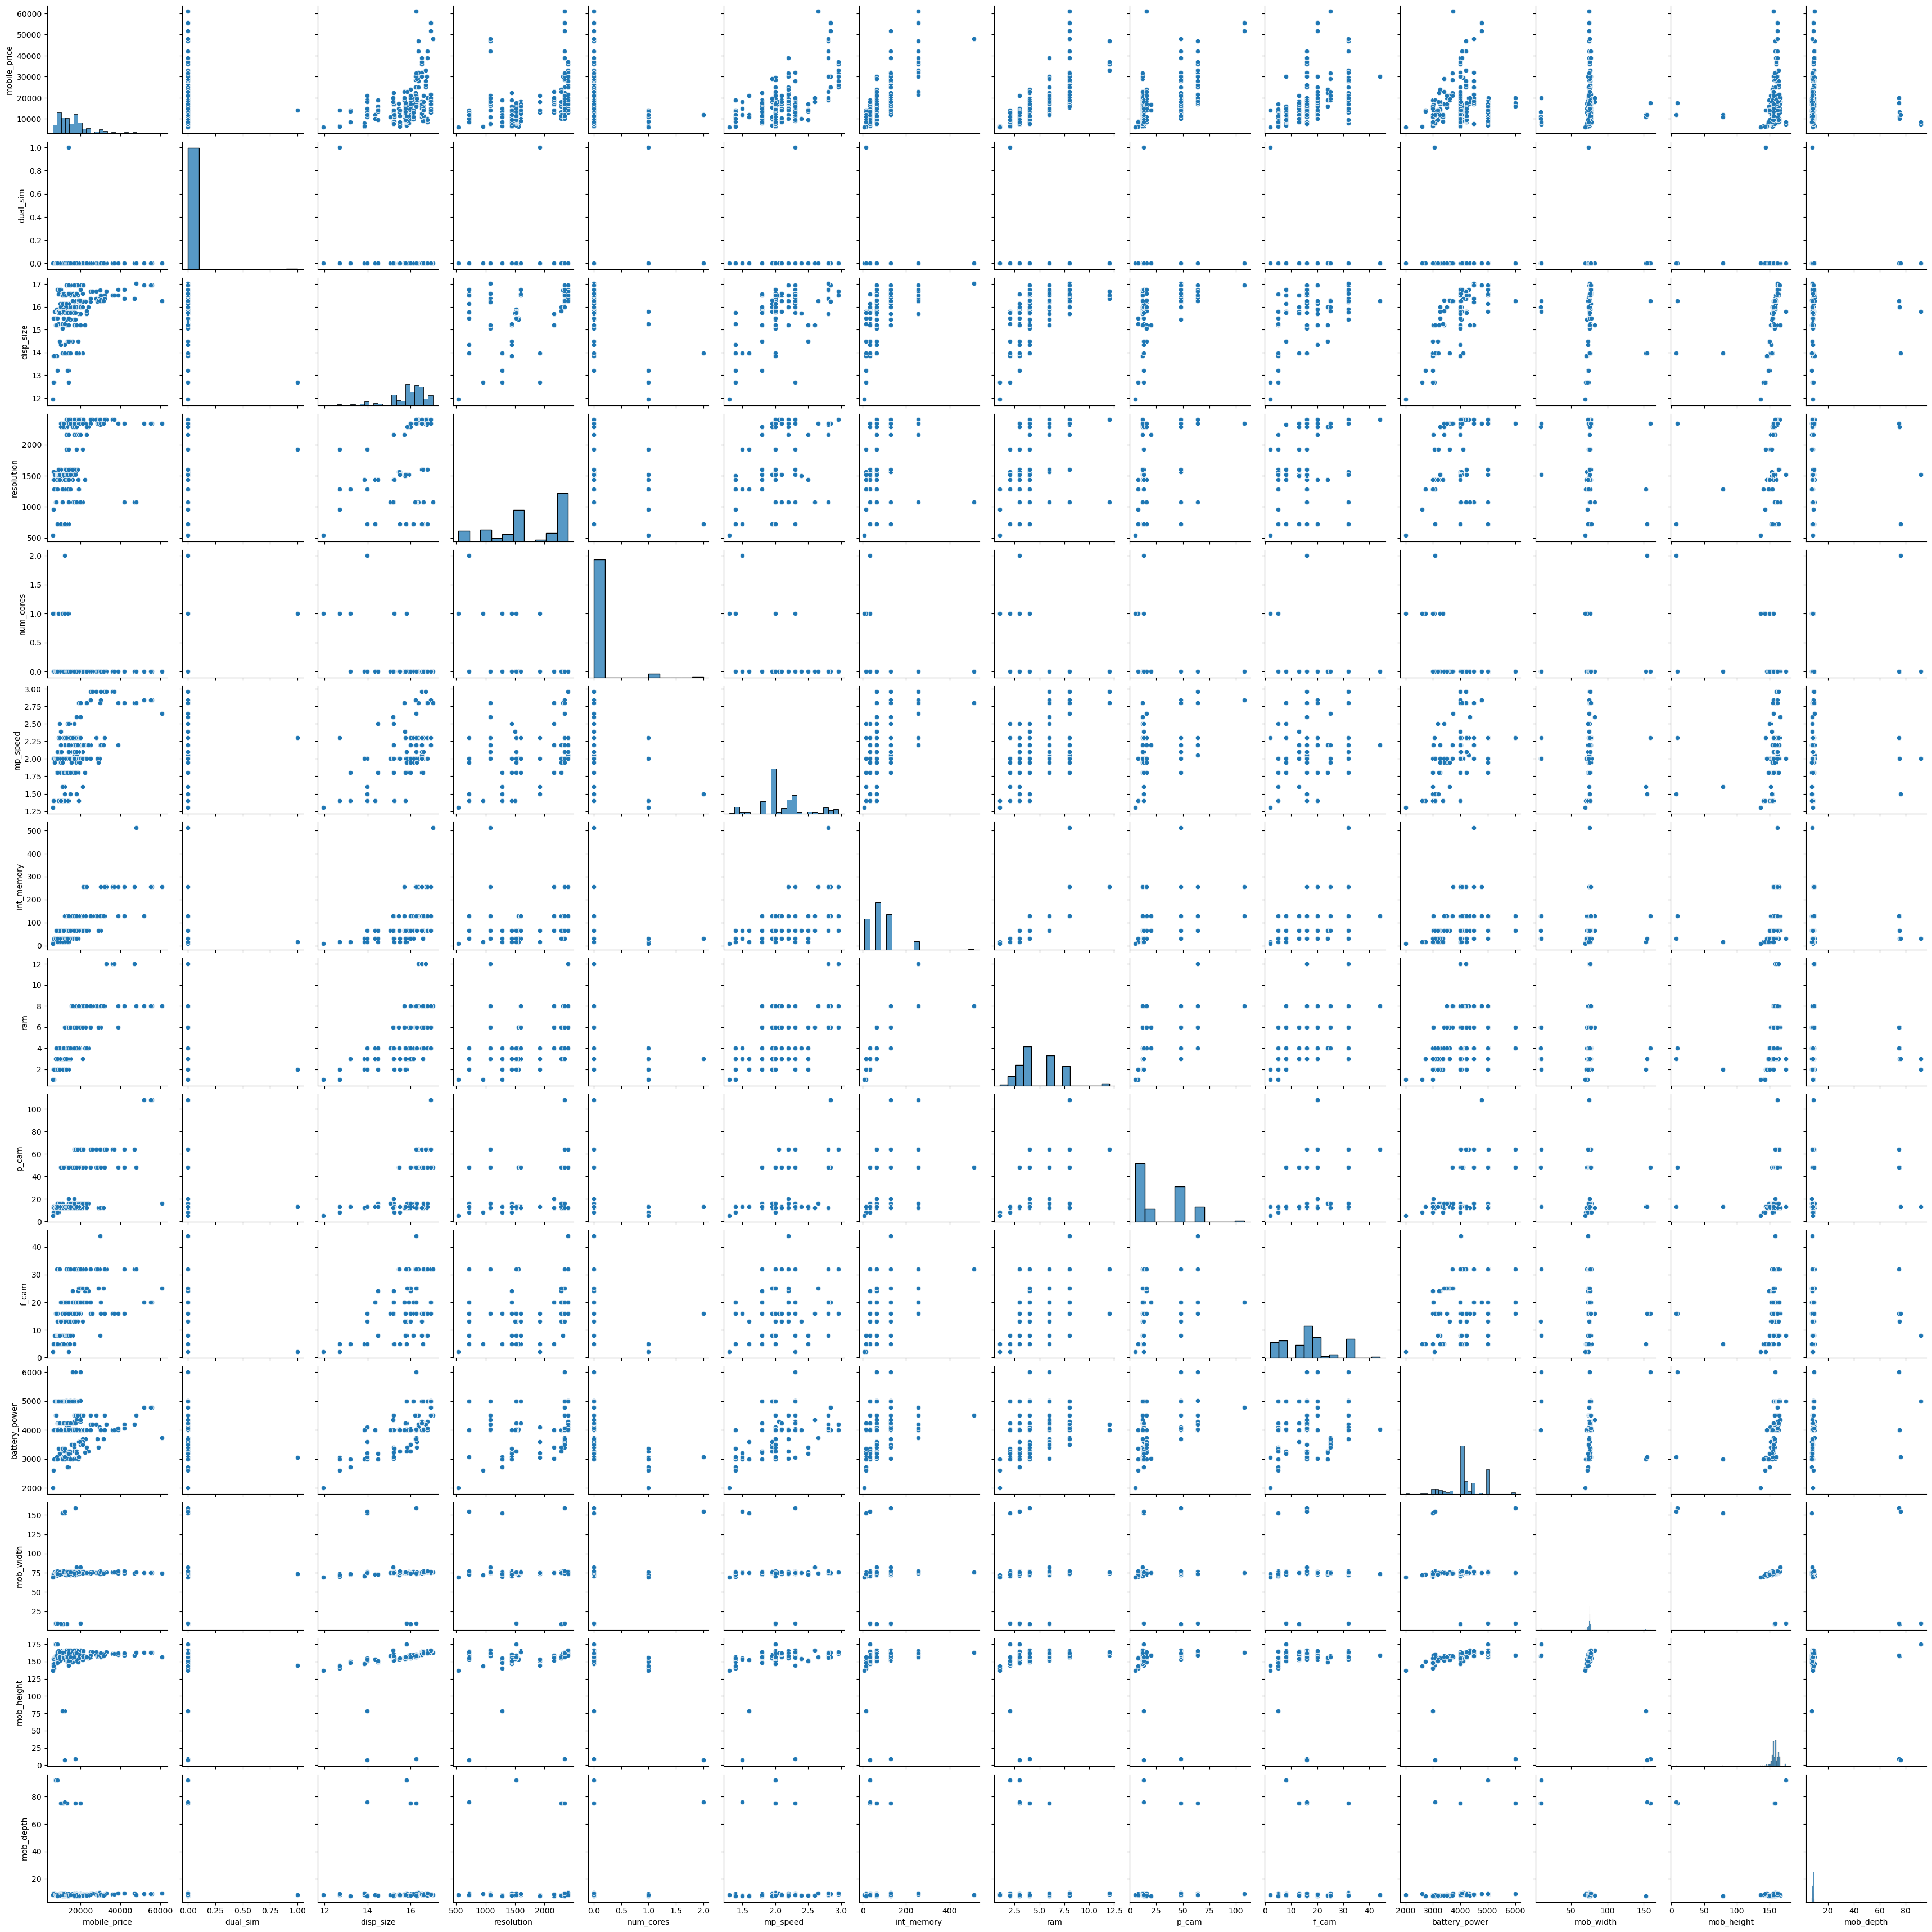

In [29]:
sns.pairplot(data)
plt.show()

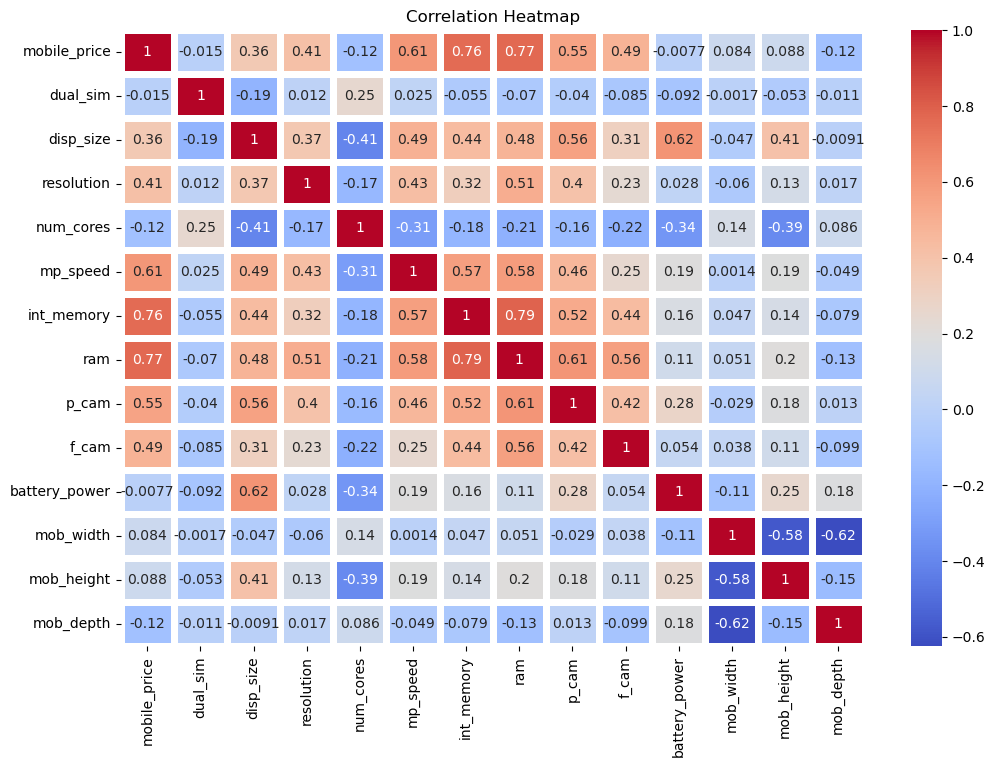

In [30]:
### Correlation Matrix and Heatmap:
correlation_matrix=data.corr()

#plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidth=5)
plt.title("Correlation Heatmap")
plt.show()

### Model Buiding

In [31]:
# Split the data into features (X) and target (y)
X = data.drop('mobile_price', axis=1)
y = data['mobile_price']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Print the preprocessed data
print(X_train.head())

     dual_sim  disp_size  resolution  num_cores  mp_speed  int_memory  ram  \
434         0      13.97      1280.0          0       1.4          64    4   
3           0      16.56      1600.0          0       2.0          64    4   
18          0      16.36      1080.0          0       2.8         128    8   
144         0      15.21      2160.0          0       1.8          64    6   
131         0      15.90      2280.0          0       1.8          64    6   

     p_cam  f_cam  battery_power  mob_width  mob_height  mob_depth  
434     13     16           3075      76.00      154.50       7.38  
3       12      5           5000      75.00      164.40       8.95  
18      64     32           4200      74.24      158.96       9.65  
144     12     20           4000      75.35      158.58       8.05  
131     12     20           4000      76.40      157.90       8.26  


In [34]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Create and fit the model
model = LinearRegression()  # or LogisticRegression() for logistic regression
model.fit(X_train_scaled, y_train)


LinearRegression()

In [38]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [46]:
# Evaluating the model for linear regression

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 12690901.50
Root Mean Squared Error (RMSE): 3562.43
Mean Absolute Error (MAE): 3156.16
R-squared (R2): 0.63
